In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

## 1. Data Preprocessing

###  • Load the Iris dataset


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Define the column names for the dataset
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset into a pandas DataFrame
iris_data = pd.read_csv(url, names=column_names)

 ### • Data exploration & cleaning

In [3]:
iris_data.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
21,5.1,3.7,1.5,0.4,Iris-setosa
65,6.7,3.1,4.4,1.4,Iris-versicolor
22,4.6,3.6,1.0,0.2,Iris-setosa


In [4]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Convert the column `species` to "category" type

In [6]:
iris_data['species'] = iris_data['species'].astype('category')

#### Check missing values

In [7]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

###  • Data visualization

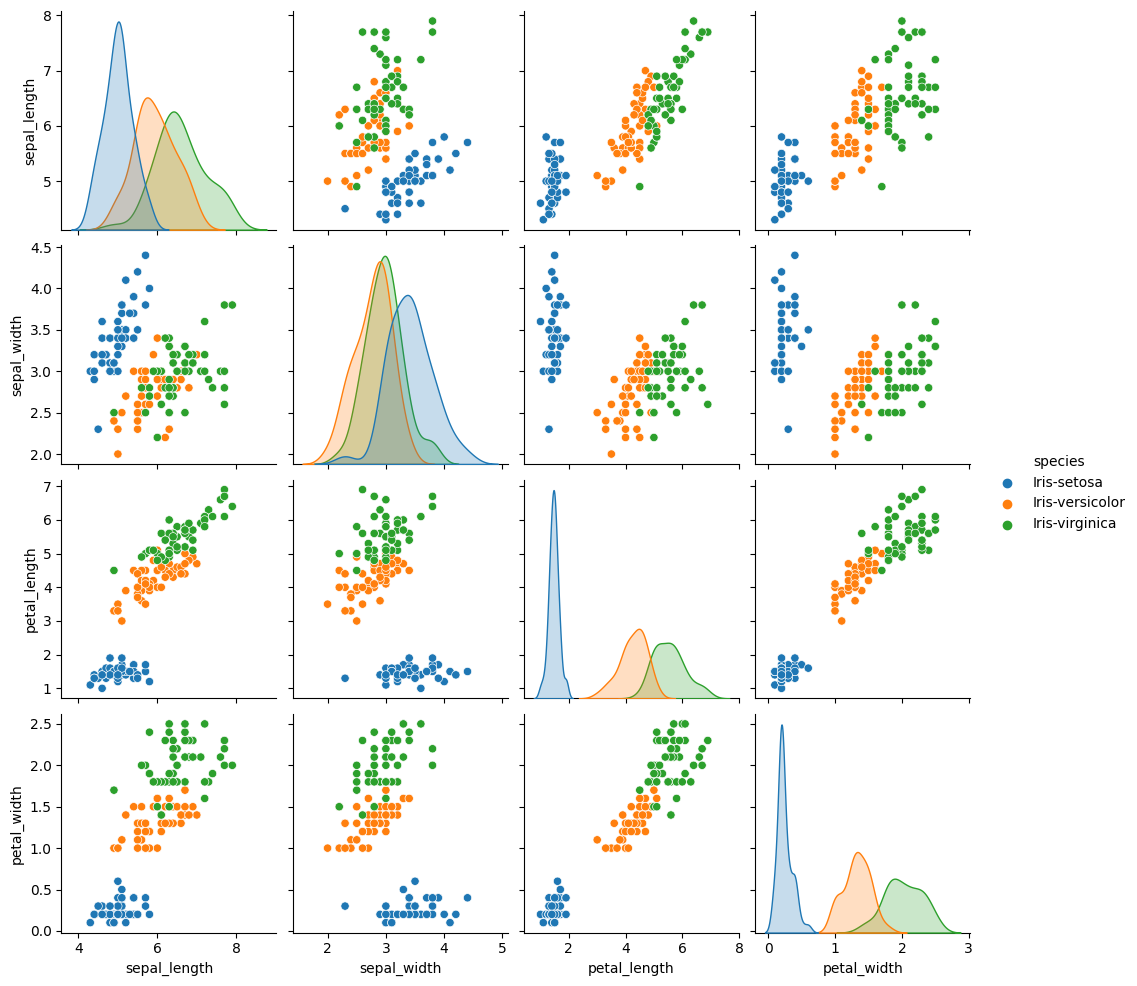

In [8]:
sns.pairplot(iris_data, hue='species')
plt.show()


### • Split the dataset into features and target variables

In [9]:
# Split the dataset into features (X) and target variable (y)
X = iris_data.drop('species', axis=1)
y = iris_data['species']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [10]:
print("Train set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTest set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Train set shapes:
X_train: (105, 4)
y_train: (105,)

Test set shapes:
X_test: (45, 4)
y_test: (45,)


## 2. Unsupervised Learning: Clustering & Outlier Detection 

### • Apply K-means clustering algorithm to cluster the data

In [11]:
# Initializing KMeans model with THREE number of clusters 
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

kmeans.fit(X_train)

# Predict cluster labels for the training data
train_cluster_labels = kmeans.predict(X_train)

###  • Visualize the clusters for every pair of feature

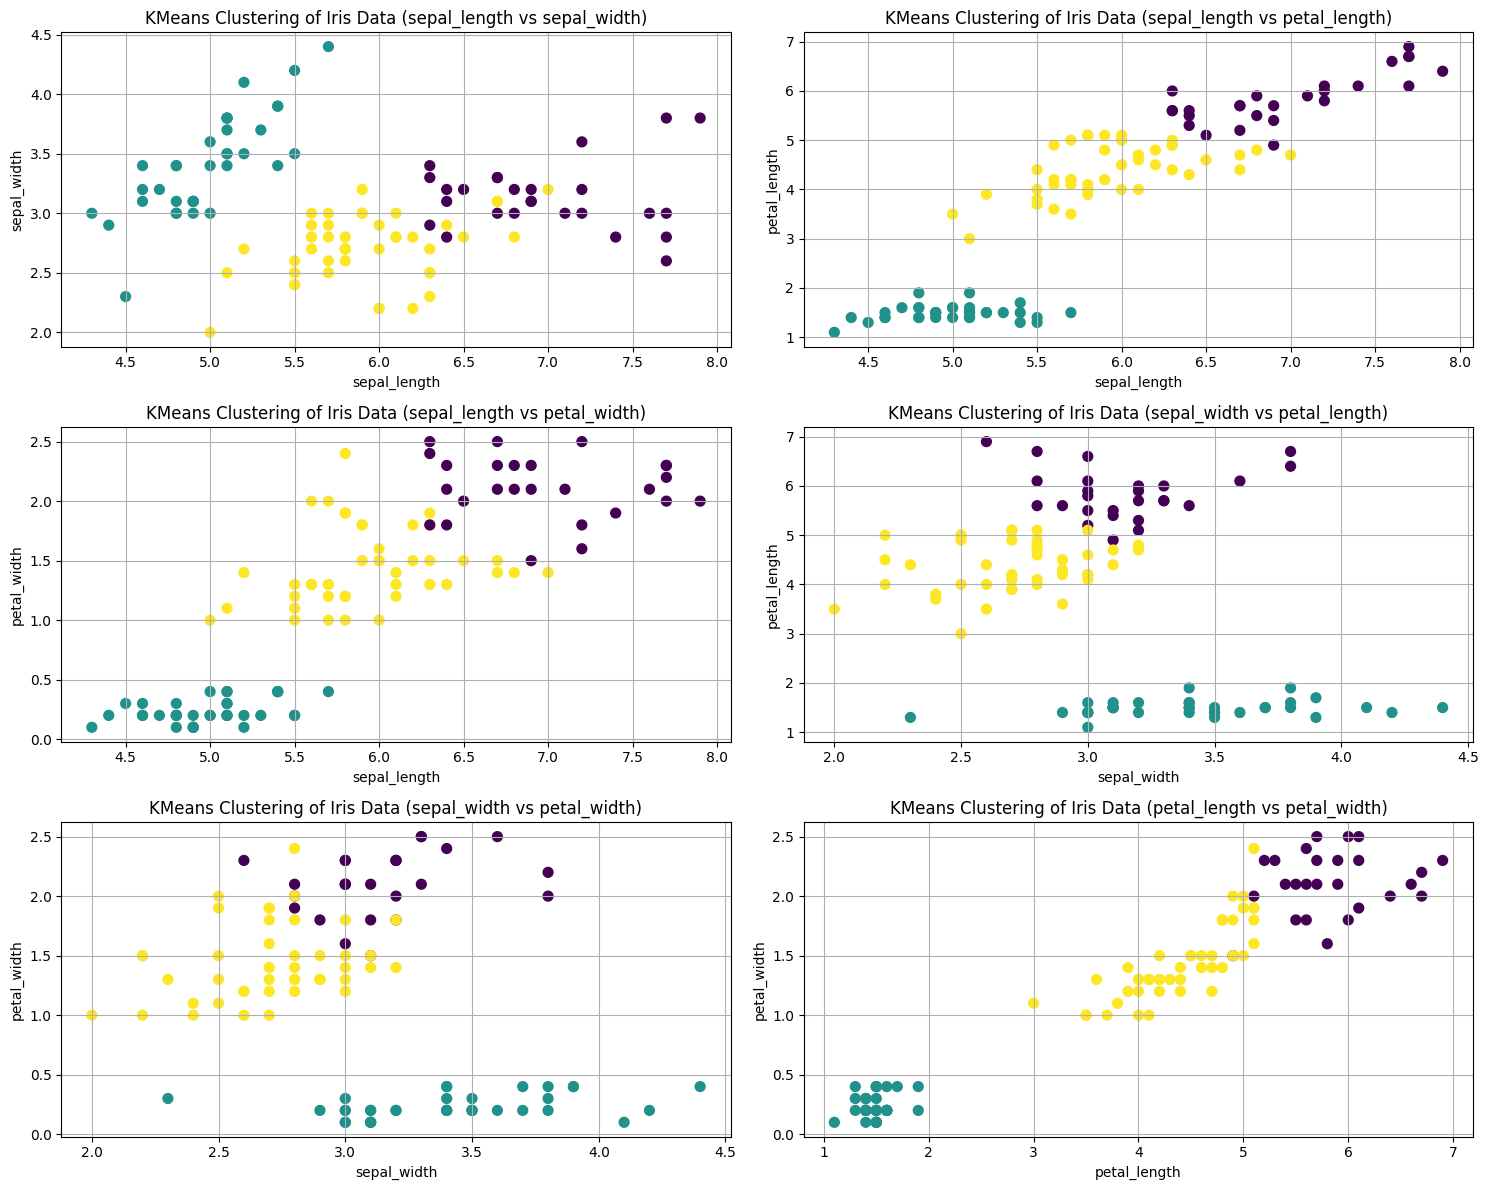

In [12]:
import itertools

# Get all possible combinations of feature pairs
feature_pairs = list(itertools.combinations(X_train.columns, 2))

# Plot each pair of features
plt.figure(figsize=(15, 12))
for i, (feature1, feature2) in enumerate(feature_pairs, 1):
    plt.subplot(3, 2, i)
    plt.scatter(X_train[feature1], X_train[feature2], c=train_cluster_labels, cmap='viridis', s=50)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'KMeans Clustering of Iris Data ({feature1} vs {feature2})')
    plt.grid(True)

plt.tight_layout()
plt.show()

###  • Detect outliers using DBSCAN

In [13]:
# Initialize DBSCAN
dbscan = DBSCAN()

# Fit DBSCAN to the data using cluster labels as features
dbscan.fit(X_train)

# Predict outliers (anomaly scores < 0)
outliers = X_train[dbscan.labels_ == -1]

print("Number of outliers detected:", len(outliers))
print(f"Outliers: \n {outliers}")

Number of outliers detected: 16
Outliers: 
      sepal_length  sepal_width  petal_length  petal_width
98            5.1          2.5           3.0          1.1
68            6.2          2.2           4.5          1.5
105           7.6          3.0           6.6          2.1
122           7.7          2.8           6.7          2.0
131           7.9          3.8           6.4          2.0
100           6.3          3.3           6.0          2.5
135           7.7          3.0           6.1          2.3
41            4.5          2.3           1.3          0.3
137           6.4          3.1           5.5          1.8
103           6.3          2.9           5.6          1.8
109           7.2          3.6           6.1          2.5
118           7.7          2.6           6.9          2.3
87            6.3          2.3           4.4          1.3
117           7.7          3.8           6.7          2.2
129           7.2          3.0           5.8          1.6
60            5.0          2

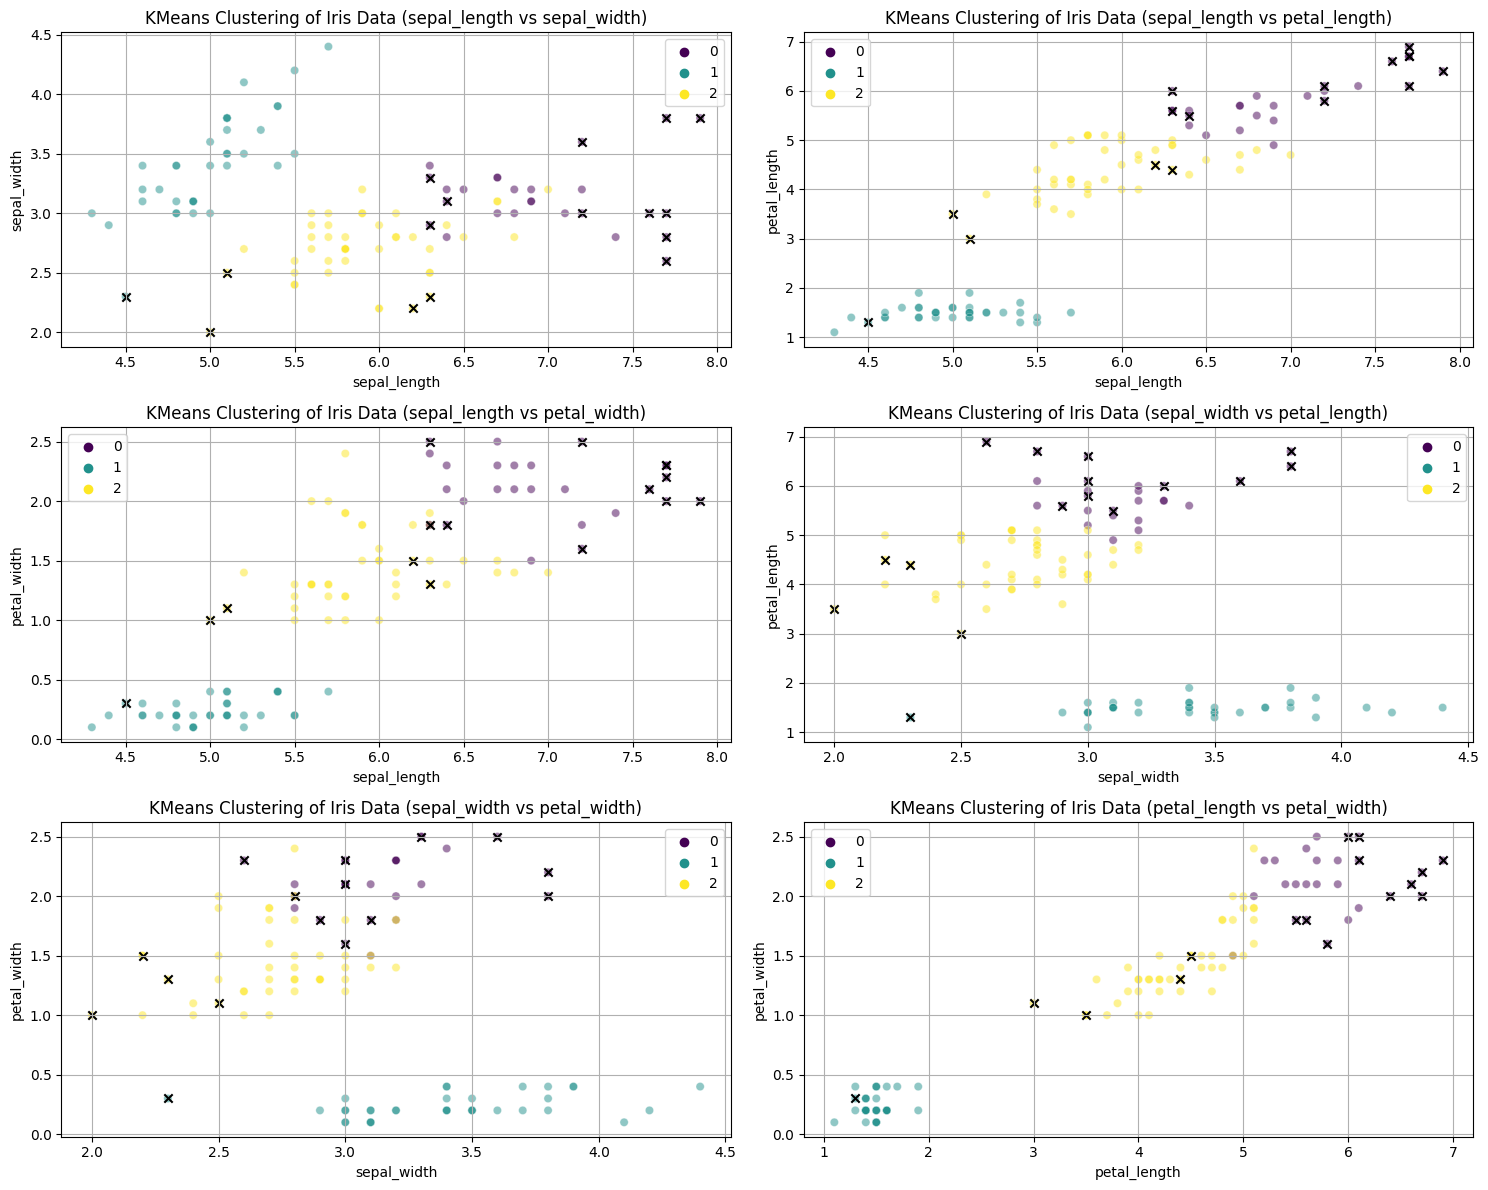

In [14]:
plt.figure(figsize=(15, 12))
for i, (feature1, feature2) in enumerate(feature_pairs, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=feature1, y=feature2, data=X_train, hue=train_cluster_labels, palette='viridis', alpha=0.5)
    
    # Plot outliers
    outliers = X_train[dbscan.labels_ == -1]
    plt.scatter(outliers[feature1], outliers[feature2], label='Outliers', c='black', marker='x')
    
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'KMeans Clustering of Iris Data ({feature1} vs {feature2})')
    plt.grid(True)

plt.tight_layout()
plt.show()


###  • Evaluate the clustering results

In [15]:
silhouette_avg = silhouette_score(X_train, train_cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5755337182565499


## 3. Supervised Learning: Baseline Model

### • Build a baseline model using default parameters

In [16]:
# Initializing Decision Tree classifier
tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)


### • Evaluate the baseline model's performance

In [17]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.80      0.89        15
 Iris-virginica       0.83      1.00      0.91        15

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



## 4. Model Comparison

## 5. Model Tuning and Ensemble